<a href="https://colab.research.google.com/github/Akhorramrouz/My-body-Your-choice/blob/main/Abortion_reasoning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
%cd "/content/drive/MyDrive/My-body-Your-choice/data/abortion_reasons"

/content/drive/MyDrive/My-body-Your-choice/data/abortion_reasons


In [57]:
df = pd.read_csv("unique_all_topics_enatilment_labled_by_GPT4_with_keyword_abortion.xlsx - unique_all_topics_enatilment_la.csv",index_col=0, header=1)

In [58]:
df.columns

Index(['Unnamed: 1', '420287', '5839651', '5839651.1', 'دلم گرفته',
       'Unnamed: 6', 'date', 'username', 'userid', 'number_comments',
       'number_pages', 'topic_id', 'forum_title',
       'بچه من بچه سقط کزدم‌بقایا موندمالان دکتر میگه کورتاژ ، نمیخوام کورتاژ‌شمچون‌بچه کوچیک داشت&دار کسی هم داشت&دار بچمو نگه داره و ... قرص چیز هست ؟ متیل ارگونین میگن چی هست ؟',
       'being_force_for_abortion', 'label', 'reason_label', 'text',
       'Unnamed: 19', 'Manual_label', 'Who'],
      dtype='object')

In [59]:
df = df.loc[df.Manual_label == "Forced"]

In [60]:
df.rename(columns={"Unnamed: 19":"Abortion_reason"},inplace=True)

In [61]:
df.rename(columns={"بچه من بچه سقط کزدم‌بقایا موندمالان دکتر میگه کورتاژ ، نمیخوام کورتاژ‌شمچون‌بچه کوچیک داشت&دار کسی هم داشت&دار بچمو نگه داره و ... قرص چیز هست ؟ متیل ارگونین میگن چی هست ؟":"topic_text"},inplace=True)

In [62]:
df.columns

Index(['Unnamed: 1', '420287', '5839651', '5839651.1', 'دلم گرفته',
       'Unnamed: 6', 'date', 'username', 'userid', 'number_comments',
       'number_pages', 'topic_id', 'forum_title', 'topic_text',
       'being_force_for_abortion', 'label', 'reason_label', 'text',
       'Abortion_reason', 'Manual_label', 'Who'],
      dtype='object')

In [63]:
df = df[['userid','topic_id','text',"Abortion_reason"]]
df.reset_index(inplace=True,drop=True)
df.index.name = "index"

In [64]:
df

,userid,topic_id,text,Abortion_reason
index,,,,
0,59f80813-fd73-4c95-9e36-f5966d088ddd,5292004,\nسلام دوستان خوووبم🌹🌹امیدوارم دلتون برعکس من ...,unknown
1,c767bb2b-d633-4e9b-a474-882f1bec9cc5,7080519,\nبچه ها باردارم کرونام گرفتم شوهرم دیروز کلی ...,unknown
2,9906f573-fa1e-4d7d-95c8-715f05d8b69f,2403897,\nخسته شدم اززندگی از دعوا از رفیق بازیاو ولگ...,unkown
3,d00911d9-5927-4b98-bdb0-a03ba658e185,10205562,\nسلام شوهرم میگه چون بچه دومم دختره دختره اول...,fetus is girl
4,4931c1a7-8c5d-4c34-ad7b-85cc55b42e4e,4610835,\nمن یه پسر سیزده ماهه دارم الان ناخواسته سه ...,fetus is girl
...,...,...,...,...
151,a2cc5607-b7fd-47d0-81a0-630fb35ab552,11066557,\nکاش هیچوقت همچین عوضی مثل تو وارد زندگیم نمی...,unknown
152,13dfd89b-c060-42de-a57e-8bd0e8127a42,8667142,\nشوهرم مجبورم کرد بچمو سقط کنم بزور کتک منو ب...,unknown
153,ac2e01e5-0092-4724-9d97-1eb006516e00,7957870,\nدوستان از تاپیک های قبلی ام میتونین بفهمین ک...,unknown


In [65]:
df['Abortion_reason'] = df.Abortion_reason.str.strip()
df.Abortion_reason.value_counts()

unknown                             57
unkown                              25
medical reason                      23
probable divorce in future          14
fetus is girl                        8
financial problems                   4
being judged                         4
concerning about child's father      3
concerning about mother's health     3
financial reason                     2
probable immigration                 2
out of marriage sex                  2
other's influence                    1
another  wife                        1
medical  reason                      1
another wife                         1
mother's health                      1
concerning about                     1
responsibility issue                 1
concerning about responsibility      1
husband's family                     1
Name: Abortion_reason, dtype: int64

In [66]:
def formatting(text):
    if "health" in text:
        return 'medical reason'
    elif 'medical' in text:
        return 'medical reason'
    elif 'unkown' in text:
        return 'unknown'
    elif "financial" in text:
        return 'financial reason'
    else:
        if text in valid_reasons:
            return text
        else:
            return "unknown"

df.Abortion_reason = df.Abortion_reason.apply(lambda x: formatting(x))
reasons = pd.DataFrame(df.Abortion_reason.value_counts())
reasons = reasons.loc[reasons.Abortion_reason > 1]

In [68]:
reasons

,Abortion_reason
unknown,89
medical reason,28
probable divorce in future,14
fetus is girl,8
financial reason,6
being judged,4
concerning about child's father,3
probable immigration,2
out of marriage sex,2


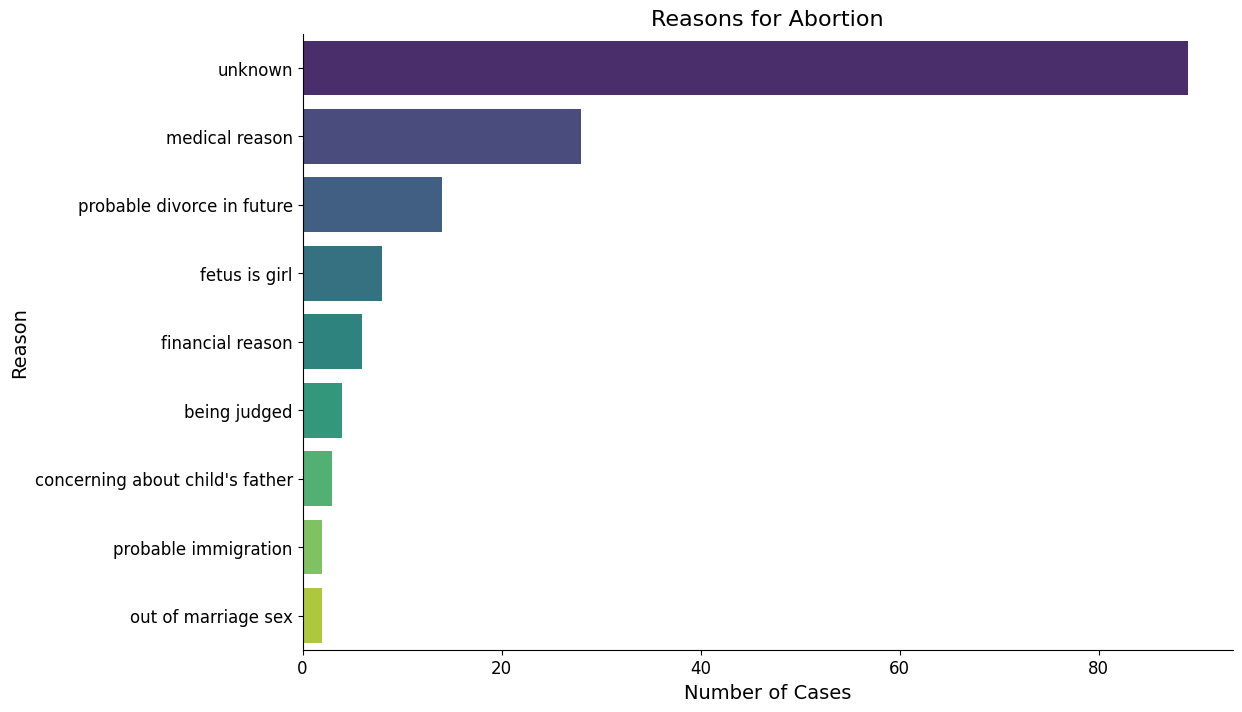

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Creating the DataFrame from the provided data
data = {
    'index': ['unknown', 'medical reason', 'probable divorce in future',
              'fetus is girl', 'financial reason', 'being judged',
              'concerning about child\'s father', 'probable immigration', 'out of marriage sex'],
    'Abortion_reason': [89, 28, 14, 8, 6, 4, 3, 2, 2]
}
df = pd.DataFrame(data).set_index('index')

# Visualizing the data
plt.figure(figsize=(12, 8))
sns.barplot(x=df['Abortion_reason'], y=df.index, palette='viridis')
plt.title('Reasons for Abortion', fontsize=16)
plt.xlabel('Number of Cases', fontsize=14)
plt.ylabel('Reason', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine()
plt.show()


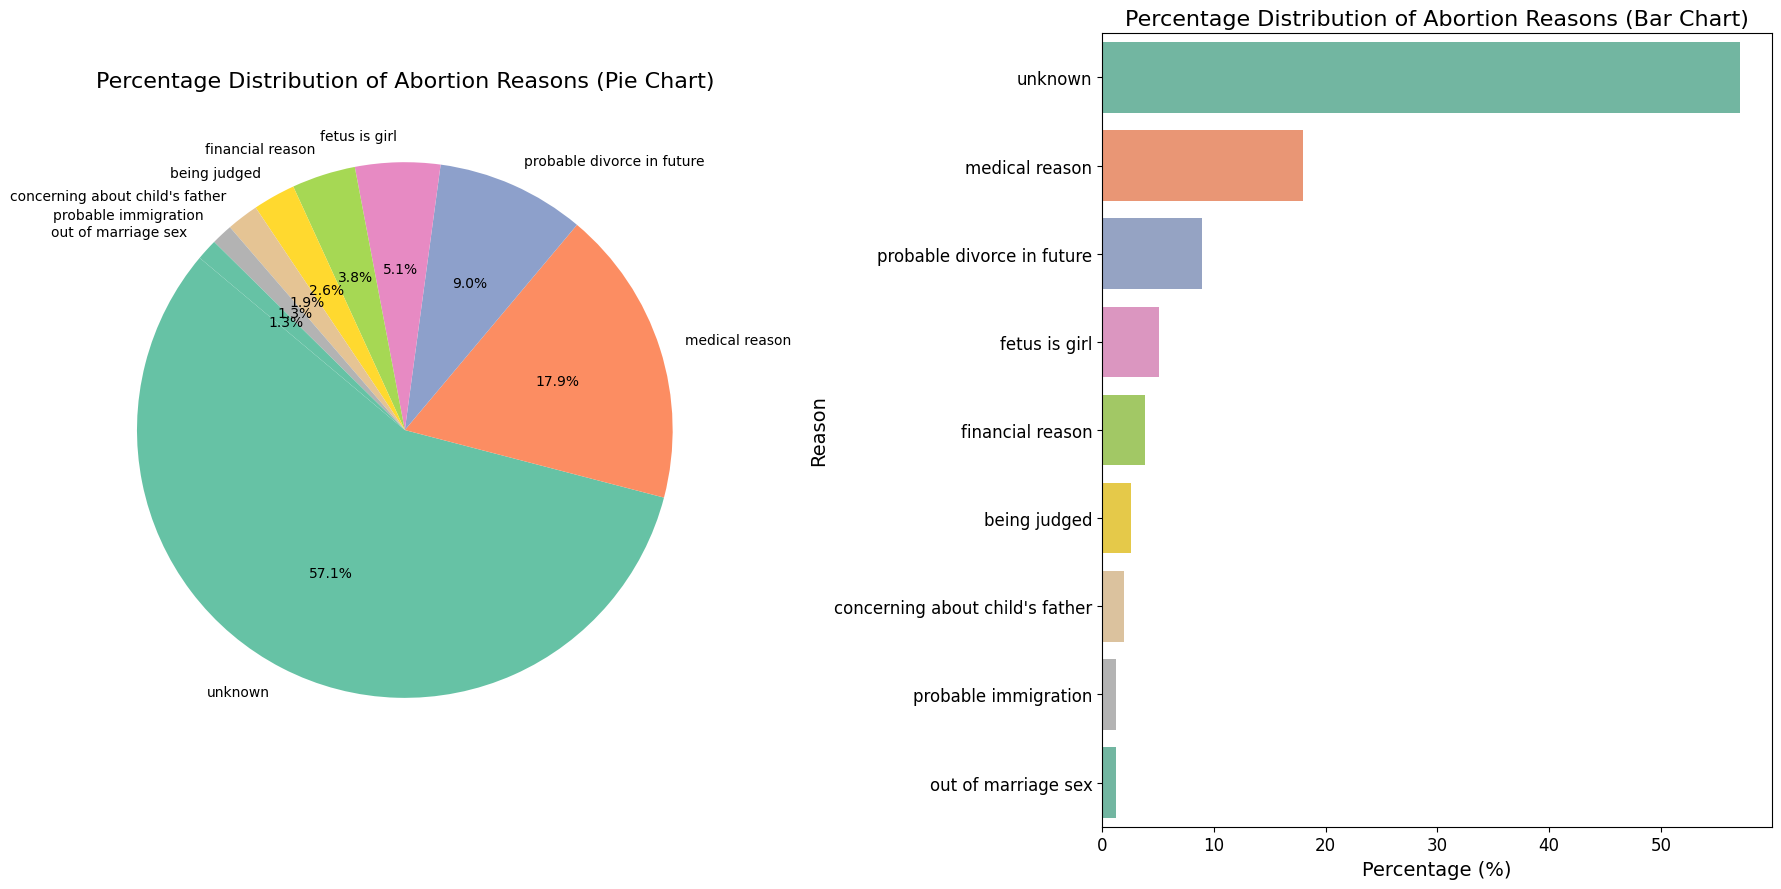

In [70]:
# Here's the Python code to create both the pie and bar charts visualizing the data in percentages.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data
data = {
    'Reason': ['unknown', 'medical reason', 'probable divorce in future',
               'fetus is girl', 'financial reason', 'being judged',
               'concerning about child\'s father', 'probable immigration', 'out of marriage sex'],
    'Cases': [89, 28, 14, 8, 6, 4, 3, 2, 2]
}
df = pd.DataFrame(data)

# Calculate percentages
df['Percentage'] = (df['Cases'] / df['Cases'].sum()) * 100

# Setting up the figure for subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 9))

# Pie chart
axes[0].pie(df['Percentage'], labels=df['Reason'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
axes[0].set_title('Percentage Distribution of Abortion Reasons (Pie Chart)', fontsize=16)

# Bar chart
sns.barplot(x=df['Percentage'], y=df['Reason'], palette='Set2', ax=axes[1])
axes[1].set_title('Percentage Distribution of Abortion Reasons (Bar Chart)', fontsize=16)
axes[1].set_xlabel('Percentage (%)', fontsize=14)
axes[1].set_ylabel('Reason', fontsize=14)
axes[1].tick_params(labelsize=12)

# Adjust layout
plt.tight_layout()
plt.show()


